In [1]:
import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o dataframes
import sklearn

df = pd.read_csv("ventas_supermercados.csv",thousands='.')  # Leer el archivo
df
headers = ["Fecha", "Ventas Pr Corrientes","Ventas Pr Constantes", "Ventas Totales", "Ventas Salon", "Ventas Online", "Ventas Totales Medio de pago", "Efectivo", "Debito", "Credito", "Otros", "Totales por Articulo", "Alimentos", "Bebidas", "Almacen", "Panaderia", "Lacteos", "Carnes", "Verduleria", "Rotiseria", "Limpieza/Perfumeria", "Indumentaria/Calzados", "Electronica","Otros"]
df.columns = headers # Cambiar los headers por los nombres de columna para ser mas descriptivos
df

,Fecha,Ventas Pr Corrientes,Ventas Pr Constantes,Ventas Totales,Ventas Salon,Ventas Online,Ventas Totales Medio de pago,Efectivo,Debito,Credito,...,Almacen,Panaderia,Lacteos,Carnes,Verduleria,Rotiseria,Limpieza/Perfumeria,Indumentaria/Calzados,Electronica,Otros
0,2017-01-01,27858872082890004,27477307666370554,2785887208289,2759173012689,267141956,2785887208289,10230100130314,6864575384024798,9047205493406398,...,670547531777,9459063067999998,288065616907,2606192941830001,10503136381999997,34077738815,4397543670589998,7723718476499998,183850709553,2806660309370001
1,2017-02-01,25994200168069103,25223428860347456,2599420016707,2574917939807,245020769,2599420016707,9719067340596005,6438494010723001,8309150301222395,...,6576624802559999,9256186147200001,2855639899579999,26000835910391,10261665437700001,32828869508000003,40532837708199993,6722905165300001,12576619026,235408490063
2,2017-03-01,2778000652224732,2633426363967878,2778000652225002,27472228718250018,307777804,2778000652225002,10244442508284997,6908522962076997,8845010493617997,...,74372641736,10161476642400002,31882591690900004,28249767257703007,107552584159,35333515476000006,435419761058,66769666531,130567491677,2266189276857
3,2017-04-01,29134272220610008,2704588446262117,2913427221961001,2882747948661001,306792733,2913427221961001,10312632366428997,7454251799721999,9458166681812003,...,8211244092969999,11323962324399997,3257140159269999,30061587602200005,10372131617099998,35969445373999997,4355706645570001,83894824575,15357263448300005,214675588727
4,2017-05-01,2796900467693989,25631863991881684,27969004676939994,27569311414939996,399693262,27969004676939994,1014761334208,6735747319130901,9220929862112993,...,7651058083627701,10330818497094003,3232635767159099,27991421231426005,98265116055459,33656800849000004,4206101605108699,9158951498100001,18244620359999996,21179714826696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-09-01,12300225242975804,2296200248544334,12300225242976002,11844751236423002,4554740065529999,12300225242976002,3808075085783998,3457538128240999,4344591137943999,...,34298836964778006,4333686607450002,14491051625599997,1472197988949,418426609273,110382394535,16336755107219998,280593430525,79771854935800005,8585647017749999
57,2021-10-01,14048748726625004,25386745245625458,14048748726625,1360006433463,448684391995,14048748726625,4332334569436999,396975149889,5015984163313002,...,37081602262490004,4773476075109999,15561031996109998,16349404553149996,478522640222,122650366242,1850172482248,332832842133,10919887989030002,10121840861939998
58,2021-11-01,141701960658651,25026615284791493,141701960658653,13595077884937298,575118180928,141701960658653,4376292814926002,3992520744942003,50752243390599996,...,36354580021517,4509964850234001,14720418135492,15761449149066007,486939798133,12136252297579998,18664160818021,32091730829959996,12754368885413002,11464394099573
59,2021-12-01,18392677235246304,315858552271807,18392677235246015,17881034171819013,511643063427,18392677235246015,5661060365843596,5541807149959801,6298812353256599,...,4519010252267298,5862106123283001,16269746856107002,21263651671063002,5864020606229,16794222224159995,21747386165462002,4758598256810001,12668801857664,16647668046690004


In [2]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Fecha                         61 non-null     object
 1   Ventas Pr Corrientes          61 non-null     int64 
 2   Ventas Pr Constantes          61 non-null     int64 
 3   Ventas Totales                61 non-null     int64 
 4   Ventas Salon                  61 non-null     int64 
 5   Ventas Online                 61 non-null     int64 
 6   Ventas Totales Medio de pago  61 non-null     int64 
 7   Efectivo                      61 non-null     int64 
 8   Debito                        61 non-null     int64 
 9   Credito                       61 non-null     int64 
 10  Otros                         61 non-null     int64 
 11  Totales por Articulo          61 non-null     int64 
 12  Alimentos                     61 non-null     int64 
 13  Bebidas               

In [35]:
# Estandarizamos porque los valores son muy extensos y poco manejables.
df ["Ventas Pr Corrientes"] = df ["Ventas Pr Corrientes"] / df ["Ventas Pr Corrientes"].max()
df ["Ventas Pr Constantes"] = df ["Ventas Pr Constantes"] / df ["Ventas Pr Constantes"].max()
df ["Ventas Totales"] = df ["Ventas Totales"] / df ["Ventas Totales"].max()
df ["Ventas Salon"] = df ["Ventas Salon"] / df ["Ventas Salon"].max()
df ["Ventas Online"] = df ["Ventas Online"] / df ["Ventas Online"].max()
df ["Ventas Totales Medio de pago"] = df ["Ventas Totales Medio de pago"] / df ["Ventas Totales Medio de pago"].max()
df ["Efectivo"] = df ["Efectivo"] / df ["Efectivo"].max()
df ["Debito"] = df ["Debito"] / df ["Debito"].max()
df ["Credito"] = df ["Credito"] / df ["Credito"].max()
df ["Otros"] = df ["Otros"] / df ["Otros"].max()
df ["Totales por Articulo"] = df ["Totales por Articulo"] / df ["Totales por Articulo"].max()
df ["Alimentos"] = df ["Alimentos"] / df ["Alimentos"].max()
df ["Bebidas"] = df ["Bebidas"] / df ["Bebidas"].max()


In [36]:
df

,Fecha,Ventas Pr Corrientes,Ventas Pr Constantes,Ventas Totales,Ventas Salon,Ventas Online,Ventas Totales Medio de pago,Efectivo,Debito,Credito,...,Almacen,Panaderia,Lacteos,Carnes,Verduleria,Rotiseria,Limpieza/Perfumeria,Indumentaria/Calzados,Electronica,Otros
0,2017-01-01,0.548637,0.806152,0.000048,0.000042,0.512195,0.000048,0.000218,0.149147,0.167507,...,670547531777,9459063067999998,288065616907,2606192941830001,10503136381999997,34077738815,4397543670589998,7723718476499998,183850709553,0.036325
1,2017-02-01,0.511916,0.740026,0.000045,0.000039,0.512195,0.000045,0.206894,0.139890,0.153842,...,6576624802559999,9256186147200001,2855639899579999,26000835910391,10261665437700001,32828869508000003,40532837708199993,6722905165300001,12576619026,0.000003
2,2017-03-01,0.054708,0.077262,0.047991,0.413401,0.512195,0.047991,0.218078,0.150102,0.163764,...,74372641736,10161476642400002,31882591690900004,28249767257703007,107552584159,35333515476000006,435419761058,66769666531,130567491677,0.000029
3,2017-04-01,0.573754,0.079349,0.050331,0.043379,0.512195,0.050331,0.219529,0.161959,0.175116,...,8211244092969999,11323962324399997,3257140159269999,30061587602200005,10372131617099998,35969445373999997,4355706645570001,83894824575,15357263448300005,0.000003
4,2017-05-01,0.055081,0.752009,0.483180,0.414862,0.512195,0.483180,0.000022,0.146348,0.170724,...,7651058083627701,10330818497094003,3232635767159099,27991421231426005,98265116055459,33656800849000004,4206101605108699,9158951498100001,18244620359999996,0.000274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-09-01,0.242234,0.067368,0.212493,0.178239,0.557402,0.212493,0.081064,0.075122,0.080439,...,34298836964778006,4333686607450002,14491051625599997,1472197988949,418426609273,110382394535,16336755107219998,280593430525,79771854935800005,0.111118
57,2021-10-01,0.276668,0.744817,0.000243,0.000020,0.512200,0.000243,0.092224,0.000009,0.092870,...,37081602262490004,4773476075109999,15561031996109998,16349404553149996,478522640222,122650366242,1850172482248,332832842133,10919887989030002,0.131000
58,2021-11-01,0.002791,0.734252,0.002448,0.204578,0.512201,0.002448,0.093160,0.086746,0.939668,...,36354580021517,4509964850234001,14720418135492,15761449149066007,486939798133,12136252297579998,18664160818021,32091730829959996,12754368885413002,0.000148
59,2021-12-01,0.362215,0.009267,0.317743,0.269073,0.512200,0.317743,0.120509,0.120407,0.116621,...,4519010252267298,5862106123283001,16269746856107002,21263651671063002,5864020606229,16794222224159995,21747386165462002,4758598256810001,12668801857664,0.215460


## MATRIZ DE CORRELACION

In [37]:
Cormat = df.corr()
Cormat

,Ventas Pr Corrientes,Ventas Pr Constantes,Ventas Totales,Ventas Salon,Ventas Online,Ventas Totales Medio de pago,Efectivo,Debito,Credito,Otros,...,Almacen,Panaderia,Lacteos,Carnes,Verduleria,Rotiseria,Limpieza/Perfumeria,Indumentaria/Calzados,Electronica,Otros
Ventas Pr Corrientes,1.000000,0.206711,0.121669,-0.028315,-0.197897,0.121669,-0.078725,-0.041525,-0.146536,0.030131,...,-0.050557,-0.106496,-0.071051,-0.102648,-0.171817,-0.080149,0.192640,-0.148058,0.048533,0.061993
Ventas Pr Constantes,0.206711,1.000000,0.057249,-0.130572,-0.169285,0.057249,-0.211633,-0.177239,0.146918,0.149682,...,-0.023934,0.157860,-0.011635,-0.038319,-0.074203,-0.014438,-0.132794,0.101295,0.078626,0.034052
Ventas Totales,0.121669,0.057249,1.000000,-0.004187,-0.130854,1.000000,-0.010988,-0.090685,0.033793,0.062390,...,0.009040,-0.149217,-0.105919,-0.061759,-0.081571,-0.068389,-0.178949,-0.079833,0.084289,-0.005908
Ventas Salon,-0.028315,-0.130572,-0.004187,1.000000,0.006008,-0.004187,-0.071666,-0.156615,-0.188860,0.281790,...,0.120419,0.131548,0.089551,-0.064669,-0.284985,0.201157,0.006830,-0.014244,-0.033674,-0.005901
Ventas Online,-0.197897,-0.169285,-0.130854,0.006008,1.000000,-0.130854,0.155613,0.384561,-0.162089,-0.074588,...,0.042913,0.279529,0.113962,-0.006981,0.170871,0.187584,-0.027990,0.184694,0.227734,-0.033864
Ventas Totales Medio de pago,0.121669,0.057249,1.000000,-0.004187,-0.130854,1.000000,-0.010988,-0.090685,0.033793,0.062390,...,0.009040,-0.149217,-0.105919,-0.061759,-0.081571,-0.068389,-0.178949,-0.079833,0.084289,-0.005908
Efectivo,-0.078725,-0.211633,-0.010988,-0.071666,0.155613,-0.010988,1.000000,0.421505,0.208520,-0.039767,...,-0.019556,0.019958,-0.133889,-0.096390,0.059116,-0.038089,0.089171,-0.065131,0.064813,0.205443
Debito,-0.041525,-0.177239,-0.090685,-0.156615,0.384561,-0.090685,0.421505,1.000000,0.201157,-0.014001,...,-0.022223,0.226167,-0.142983,0.077323,0.091828,-0.000949,0.159832,-0.019069,0.060354,-0.154527
Credito,-0.146536,0.146918,0.033793,-0.188860,-0.162089,0.033793,0.208520,0.201157,1.000000,-0.179746,...,-0.081020,-0.094468,-0.247526,-0.129467,0.225971,0.003202,0.013398,0.237346,-0.035137,-0.052795
Otros,0.030131,0.149682,0.062390,0.281790,-0.074588,0.062390,-0.039767,-0.014001,-0.179746,1.000000,...,-0.165507,0.020108,0.013458,0.222070,-0.128793,-0.034020,0.109966,-0.051689,-0.042977,-0.042701


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

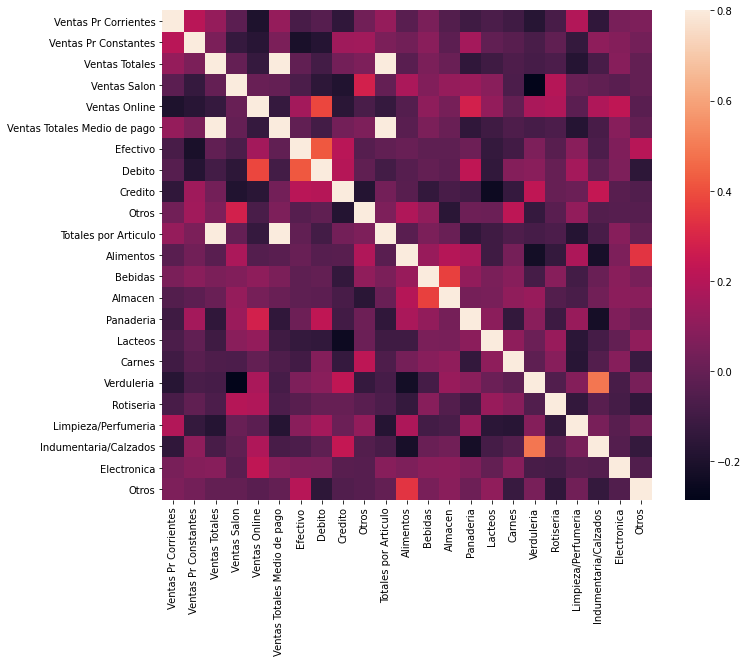

In [39]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(Cormat, vmax=.8, square=True)
# vmax: Hasta donde llega el gradiente, el difuminado de color, si fuera 1 seria hasta ser totalmente blanco.

# Interpretación: Mientras mas claro sean los colores, mayor correlación habra entre variables.